In [1]:
import os.path as op
import sys
sys.path.append(op.abspath('../'))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models
import var, fcts

from project import files, defs, col, normalize
from lib import data, plot as lp, bdt as lBDT

import hdbscan

In [3]:
import lib.rootdata as lrd
import lib.plot as lp

In [4]:
run = "00405127"
num = "0644" # id of the file for the given run

# Eta and layer to keep
# eta = 0.05
# layer = 0
eta = None
layer = 2

In [6]:
file_path = files.get_path_run_num(run=run, num=num)

# Given {rapidity} and given {layer}
dataframe = lrd.load_ROOT_into_dataframe(
    file_path, 
    tree_name=defs.unproc_tree_name,
    variables=defs.unproc_kept_variables,
    cut=files.get_cut(eta=eta, layer=layer),
)

/mnt/c/900GeV/
Number of events in the dataframe 5819520
Time taken to load the ROOT files: 38.17505764961243
ROOT files loaded: /mnt/c/900GeV/00405127/atlas/data21_900GeV.00405127.physics_L1Calo.merge.RAW._lb0644._SFO-ALL._0001.root


In [7]:
dataframe = files.process_dataframe(dataframe)
dataframe = dataframe.sample(300000)
dataframe = normalize.normalise_df(dataframe)
dataframe = files.compute_voi(
    dataframe,
    ['std_pos', 'std_neg'])

Remove NaN events
5196 events removed out of 5819520 -> efficiency 0.0008928571428571428
Time taken: 54.1396918296814
Time taken: 0.1695694923400879
Time taken: 0.5550289154052734


In [8]:
columns_to_compute = ['min_std_pos_neg']
formula_columns = col.get_formula_columns(columns_to_compute)
dataframe = data.compute_vals(dataframe, formula_columns)

dataframe = dataframe.query('min_std_pos_neg > 0.02')

In [9]:
samples_columns = defs.list_samples_columns + ['old_mean','old_std']
df_for_clustering = dataframe[samples_columns]

In [10]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 10, min_samples = 1, cluster_selection_epsilon = 2)
clusterer.fit(df_for_clustering)

HDBSCAN(cluster_selection_epsilon=2, min_cluster_size=10, min_samples=1)

/tmp/ipykernel_569/749147887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering['hdbscan'] = clusterer.labels_


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Hdbscan Labels', ylabel='Number of events'>)

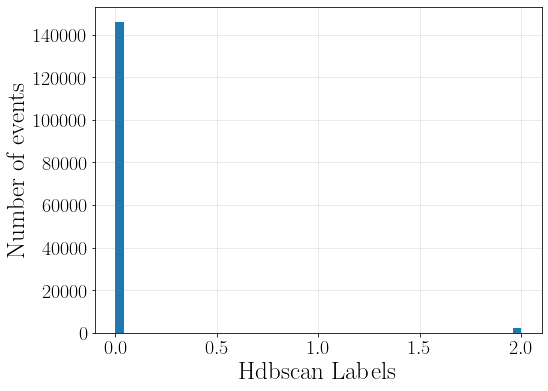

In [11]:
df_for_clustering['hdbscan'] = clusterer.labels_
lp.plot_hist(df_for_clustering['hdbscan'], 'Hdbscan Labels')

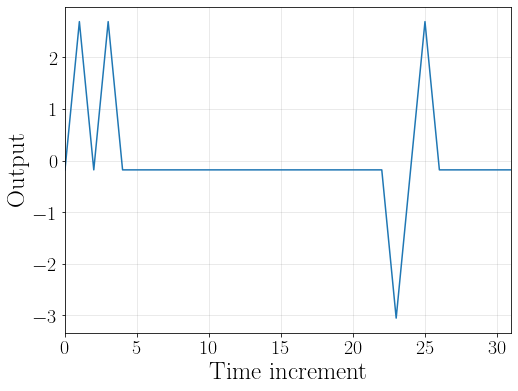

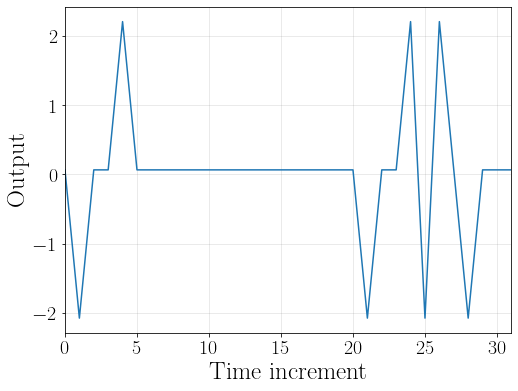

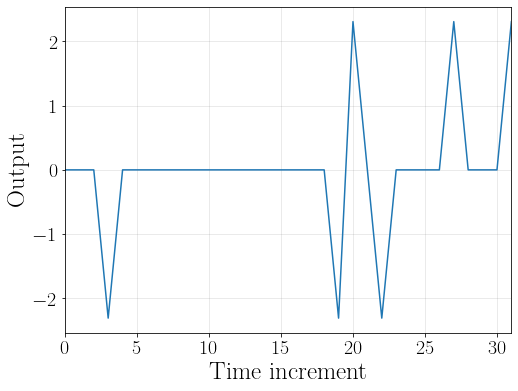

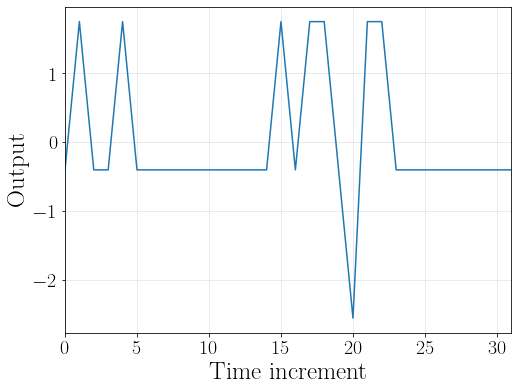

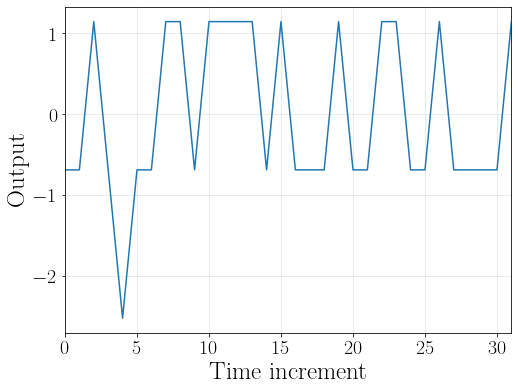

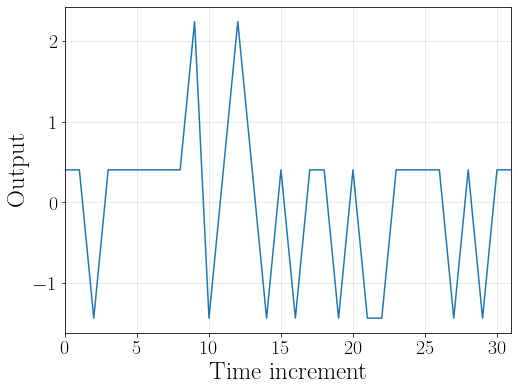

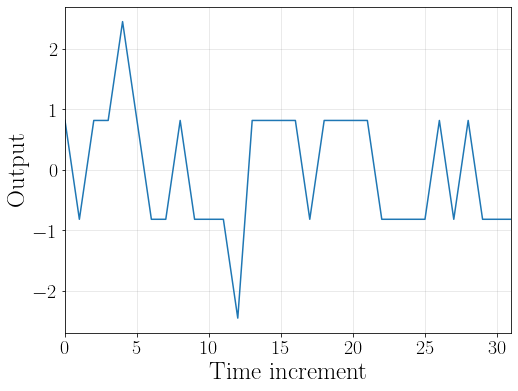

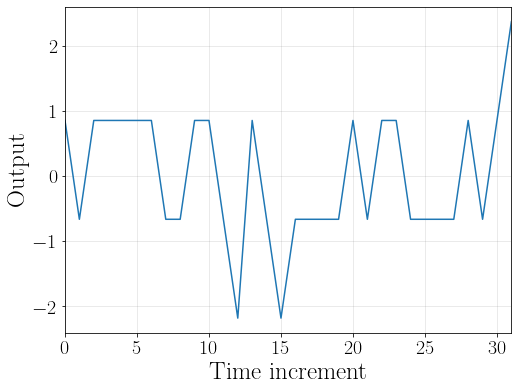

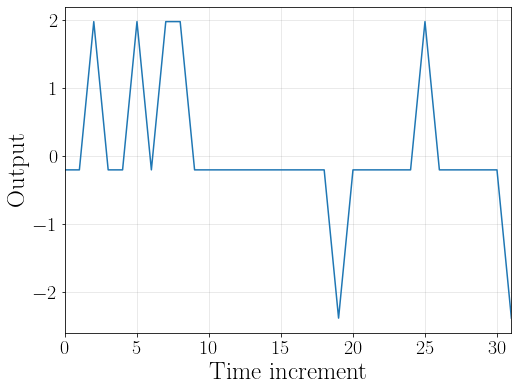

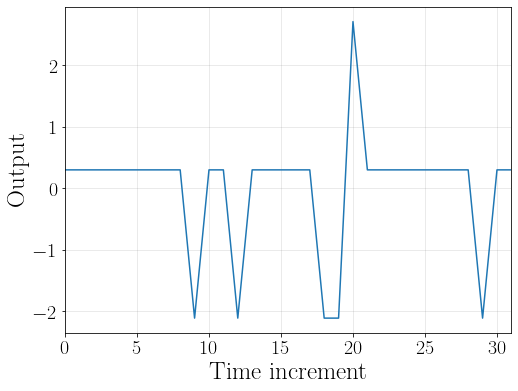

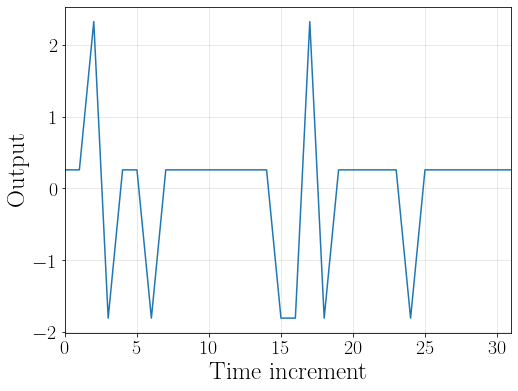

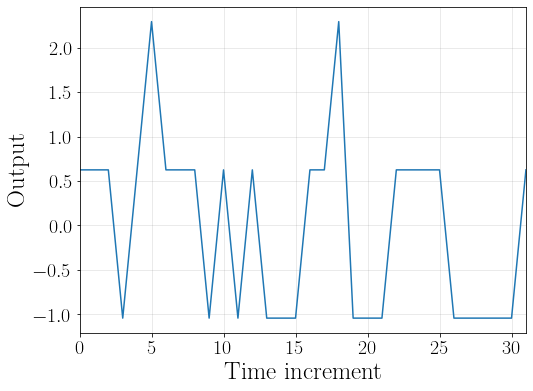

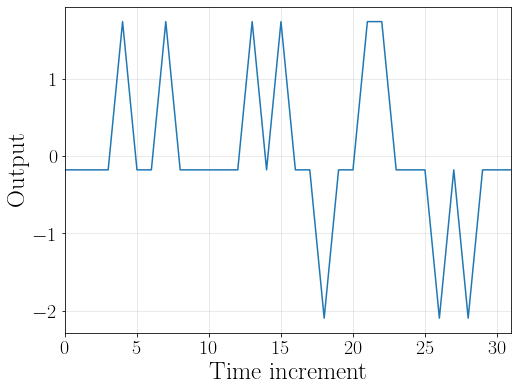

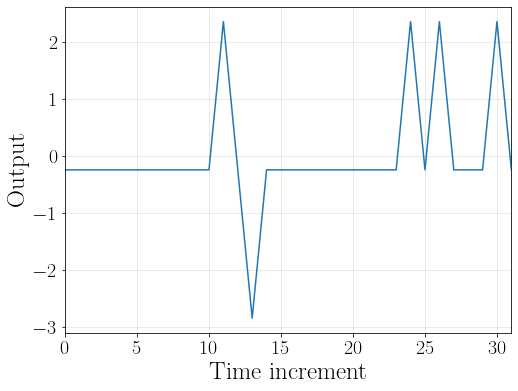

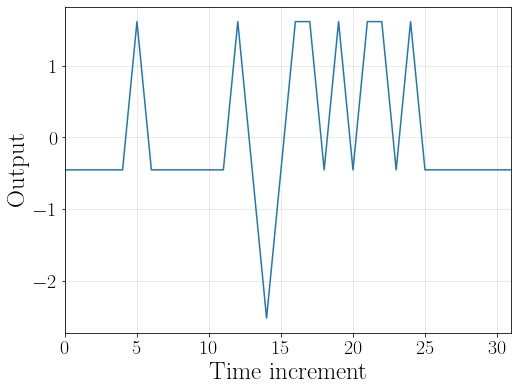

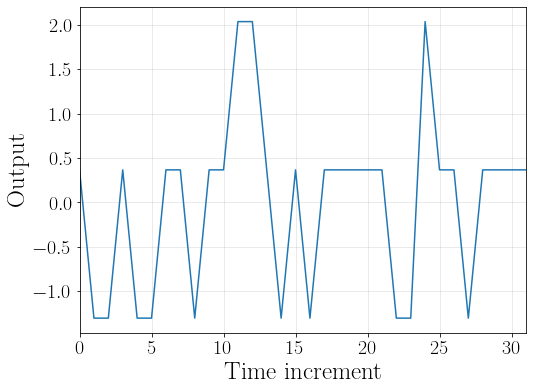

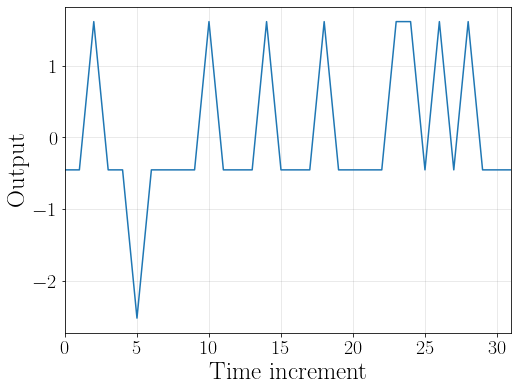

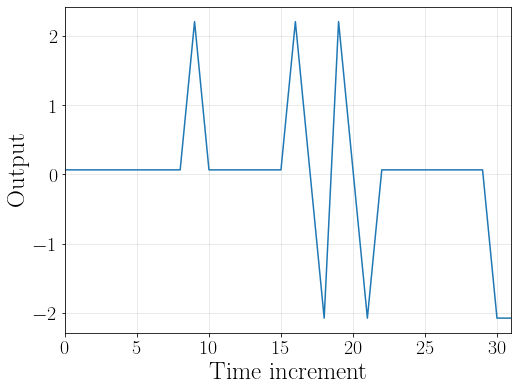

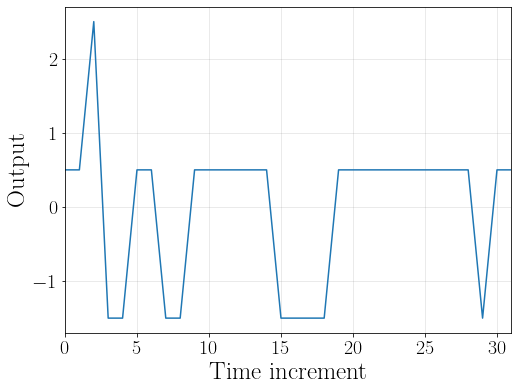

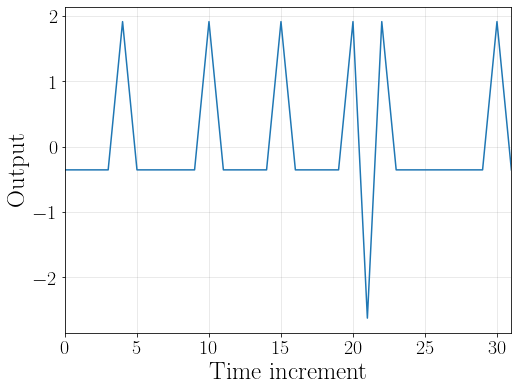

In [12]:
for i in range(20):
    lp.plot_event(df_for_clustering.query("hdbscan == 1").iloc[i])

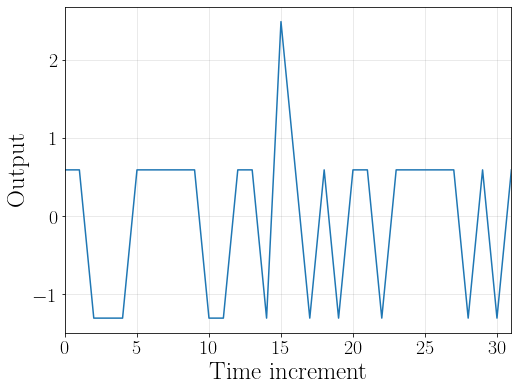

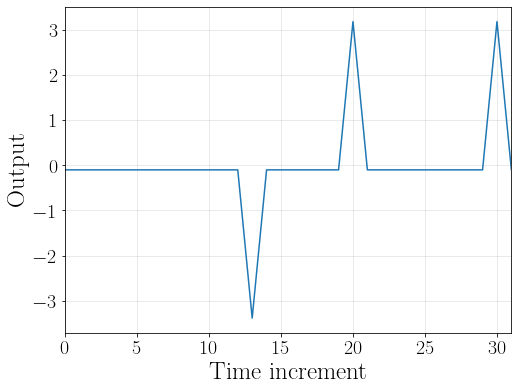

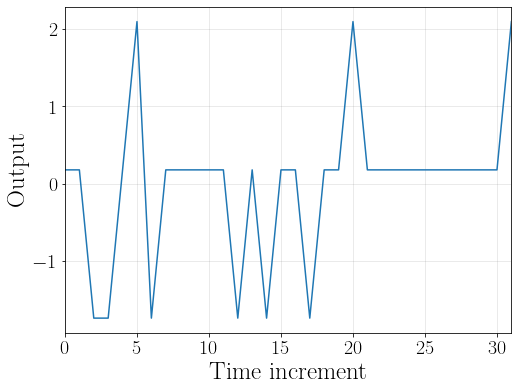

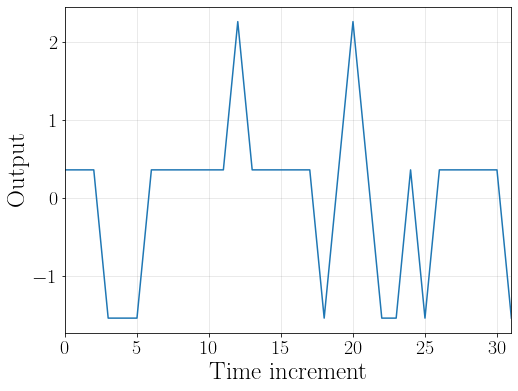

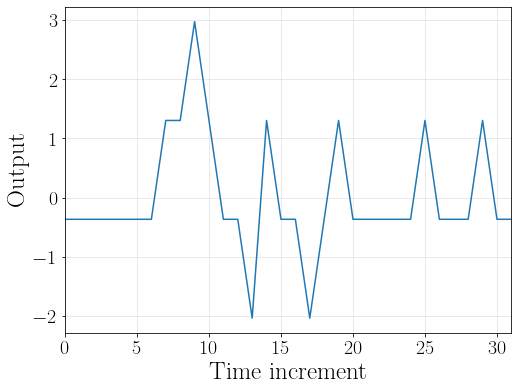

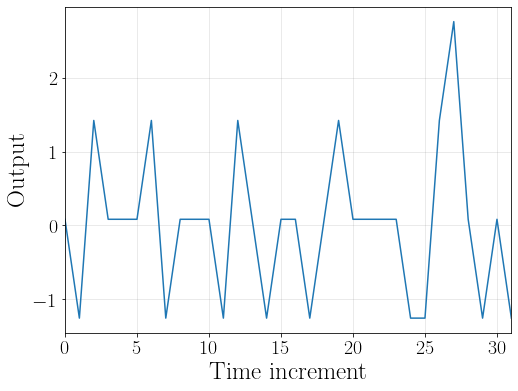

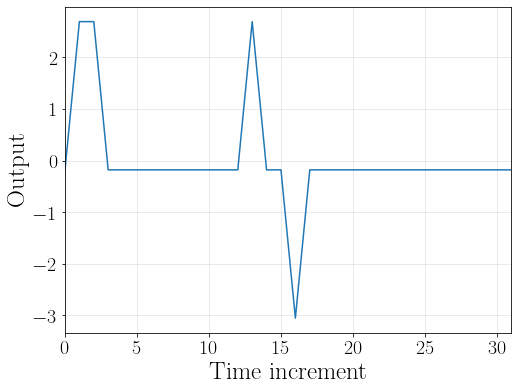

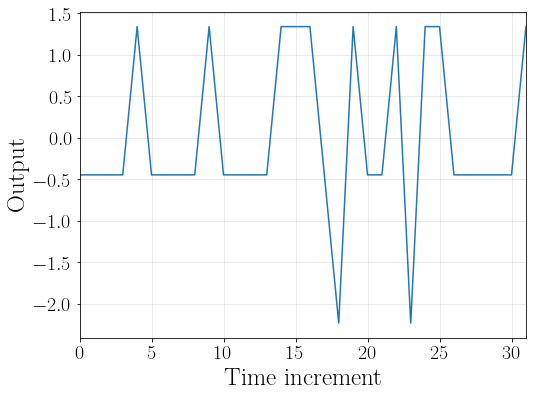

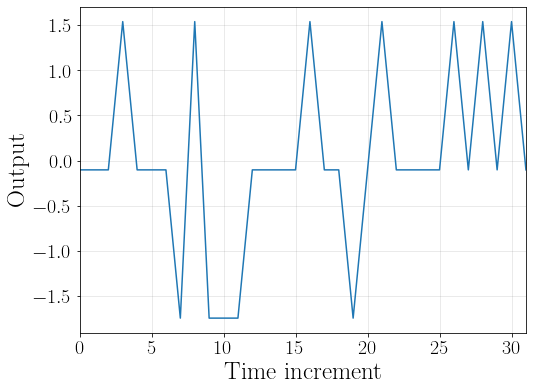

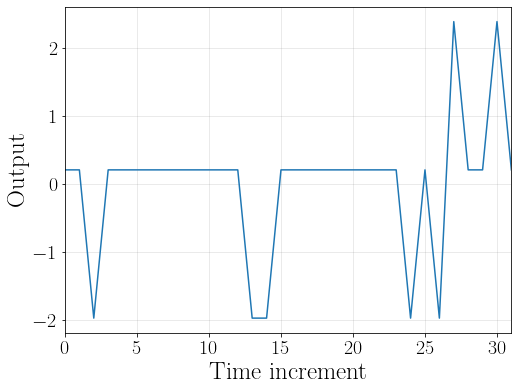

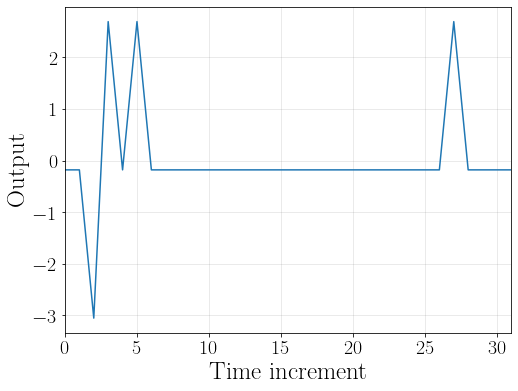

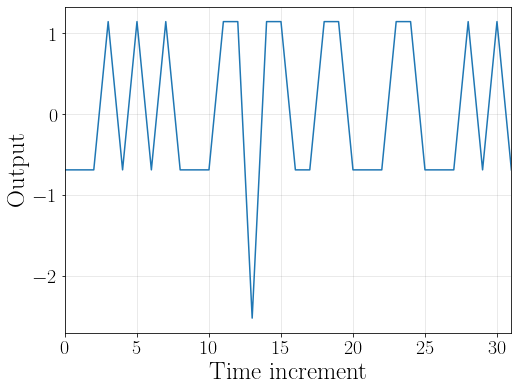

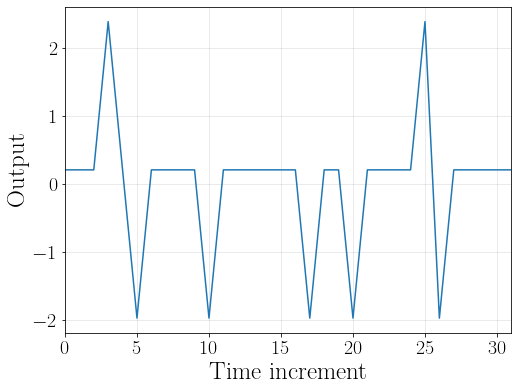

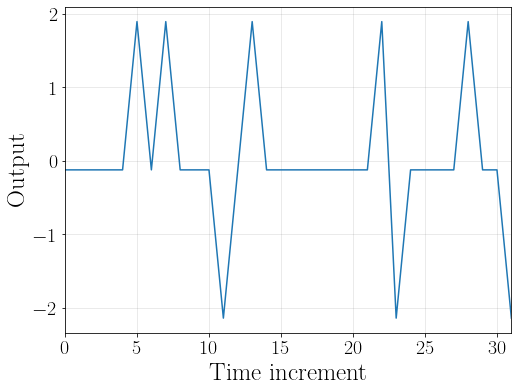

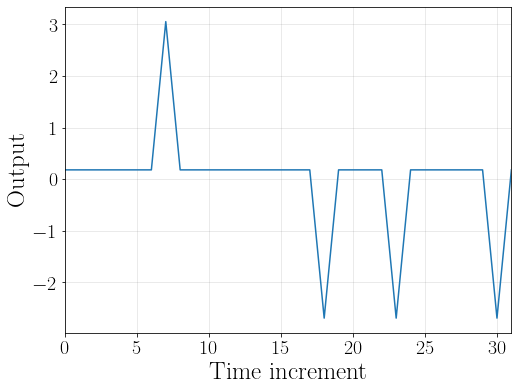

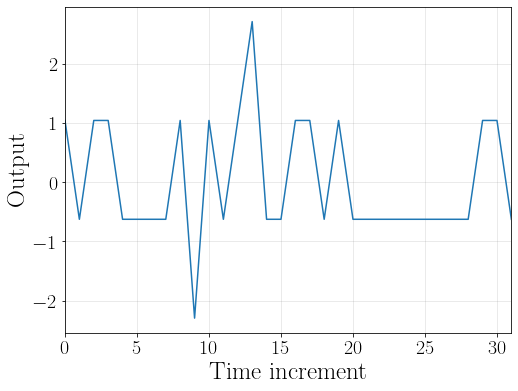

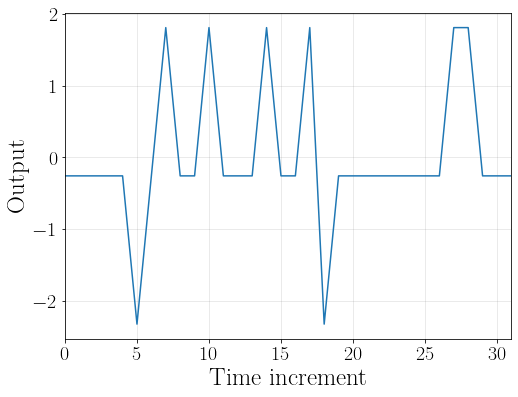

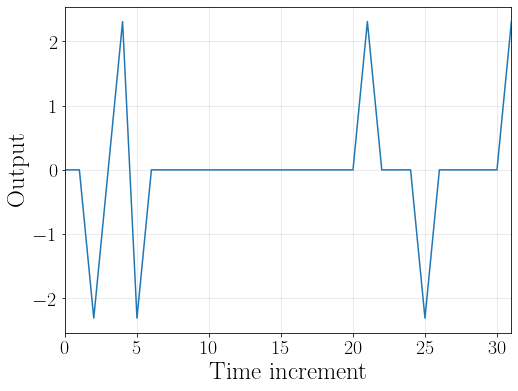

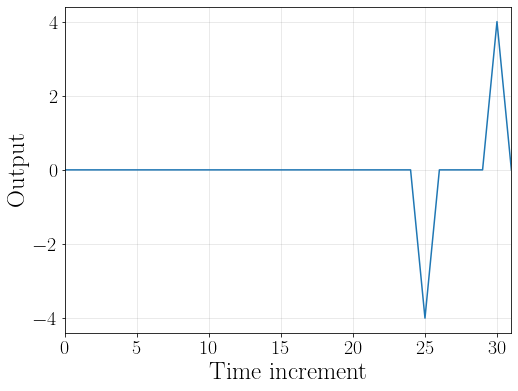

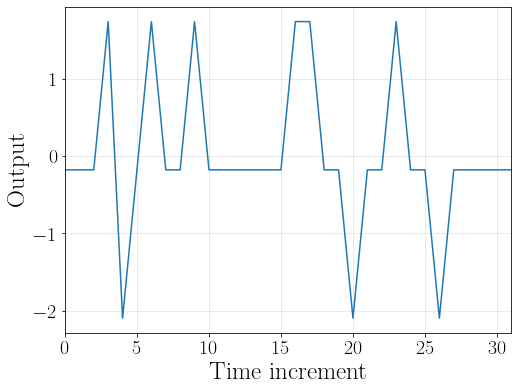

In [13]:
for i in range(20):
    lp.plot_event(df_for_clustering.query("hdbscan == 2").iloc[i])

## New parameters

In [15]:
df_for_clustering2 = dataframe[samples_columns]

In [16]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size = 10, min_samples = 1, cluster_selection_epsilon = 0.1)
clusterer2.fit(df_for_clustering2)

HDBSCAN(cluster_selection_epsilon=0.1, min_cluster_size=10, min_samples=1)

/tmp/ipykernel_569/402157058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_clustering2['hdbscan'] = clusterer2.labels_


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='Hdbscan Labels', ylabel='Number of events'>)

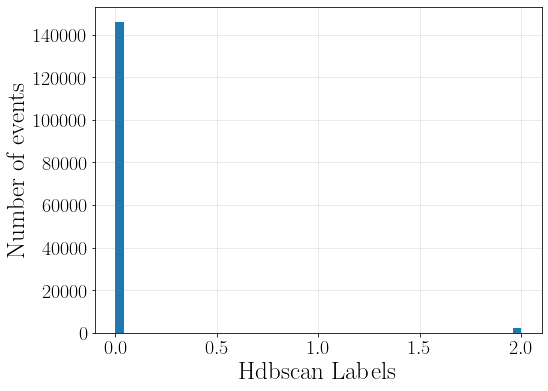

In [17]:
df_for_clustering2['hdbscan'] = clusterer2.labels_
lp.plot_hist(df_for_clustering2['hdbscan'], 'Hdbscan Labels')

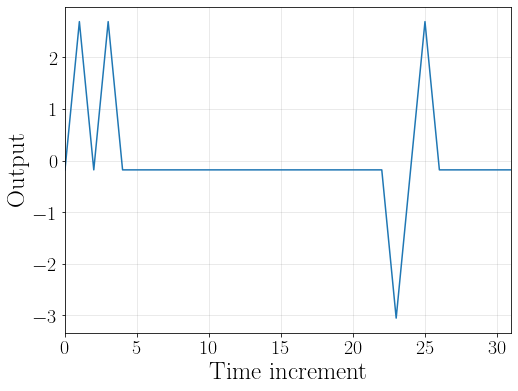

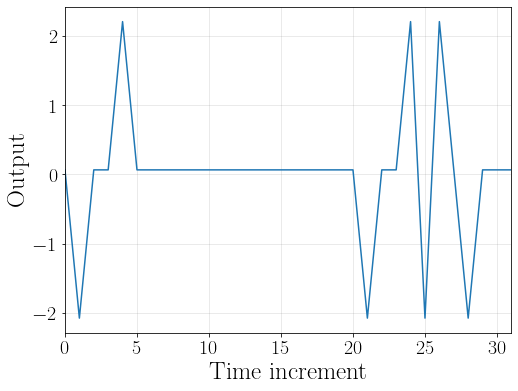

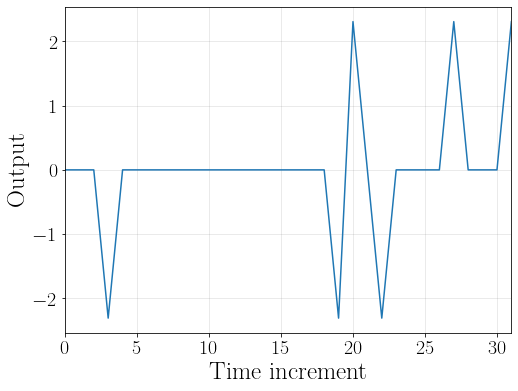

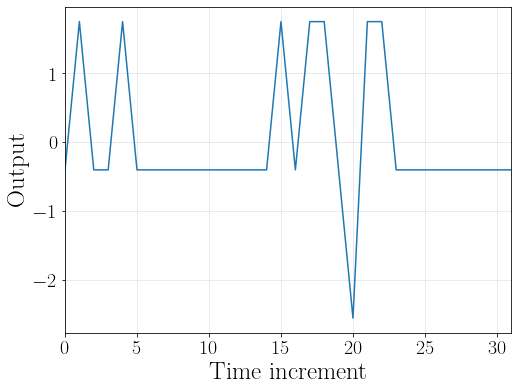

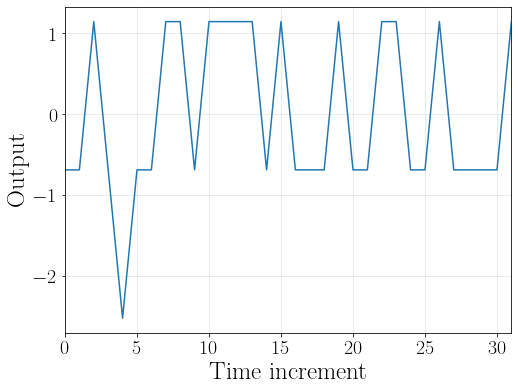

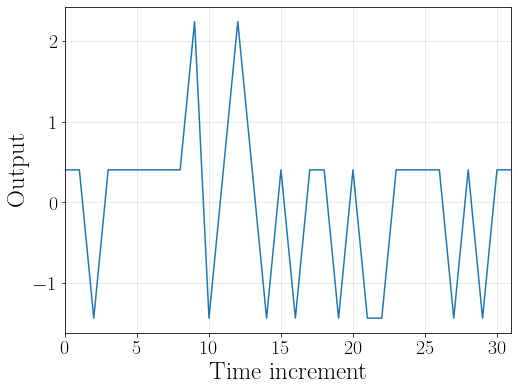

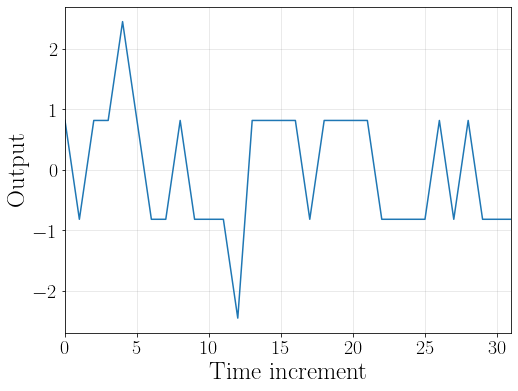

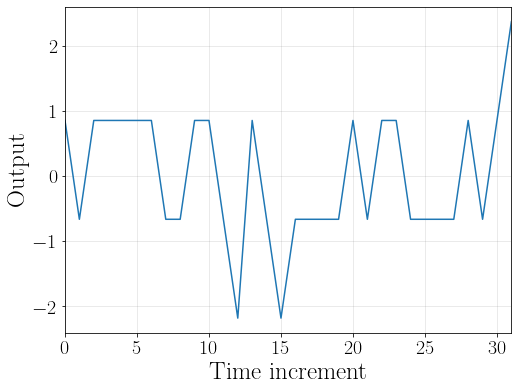

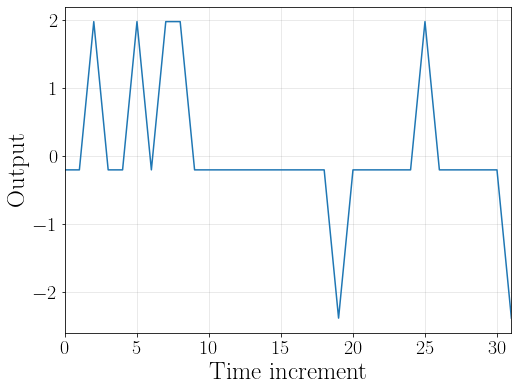

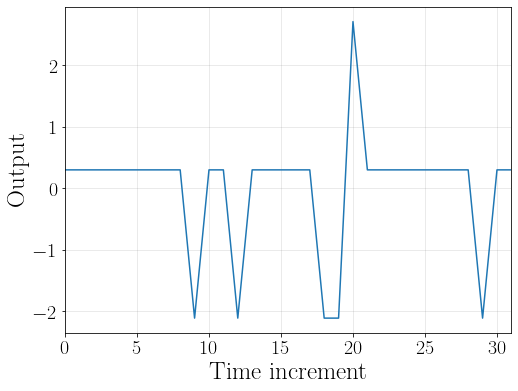

In [18]:
for i in range(10):
    lp.plot_event(df_for_clustering2.query("hdbscan == 1").iloc[i])

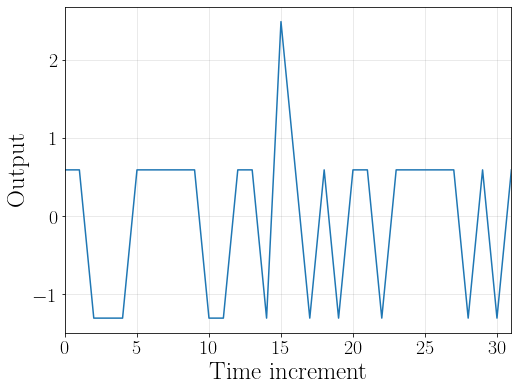

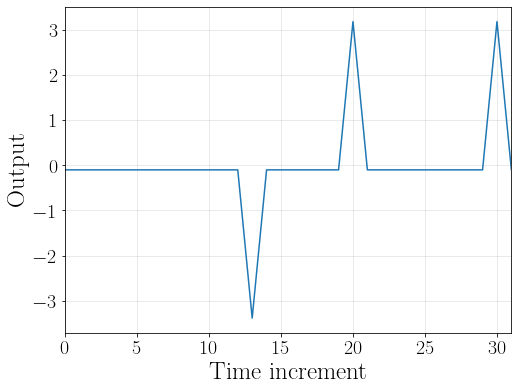

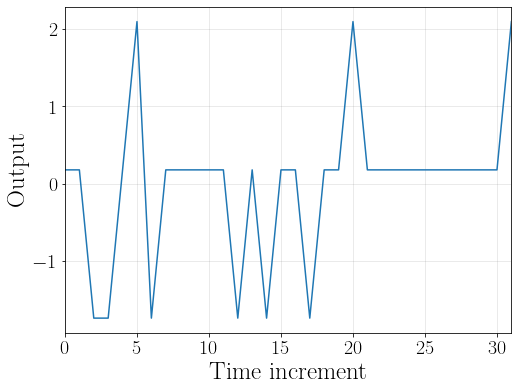

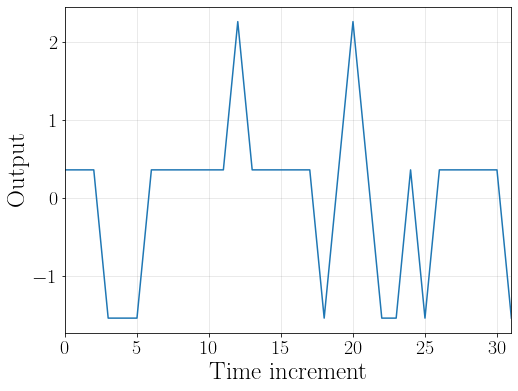

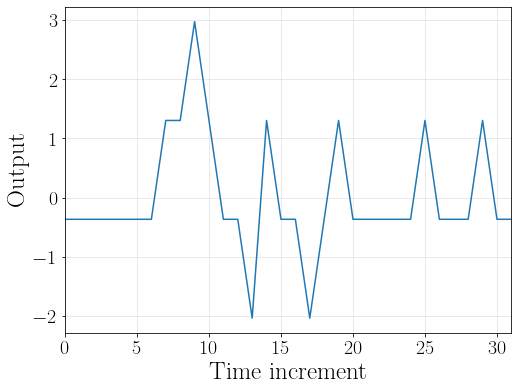

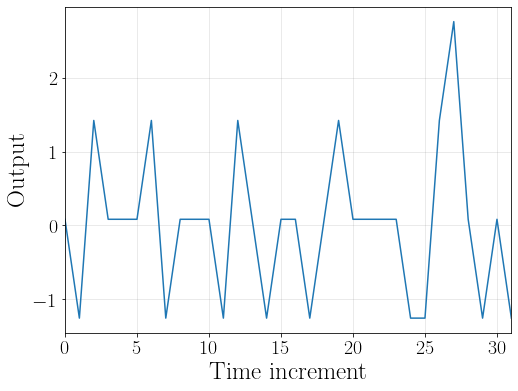

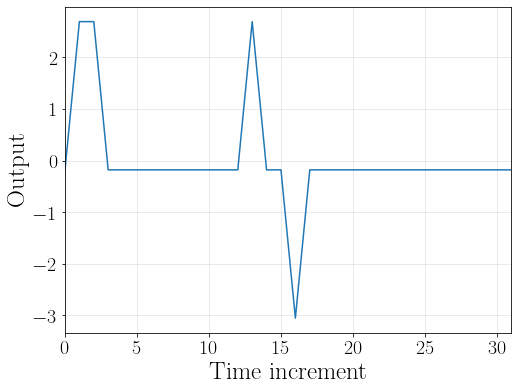

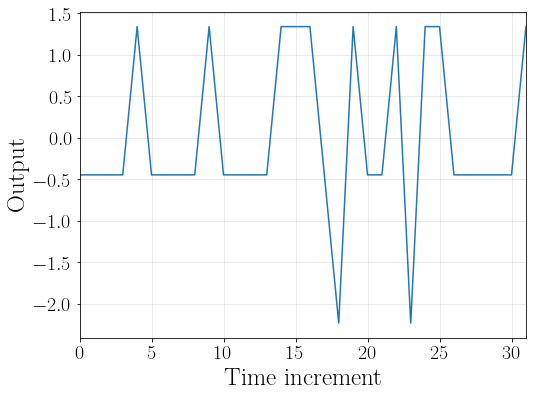

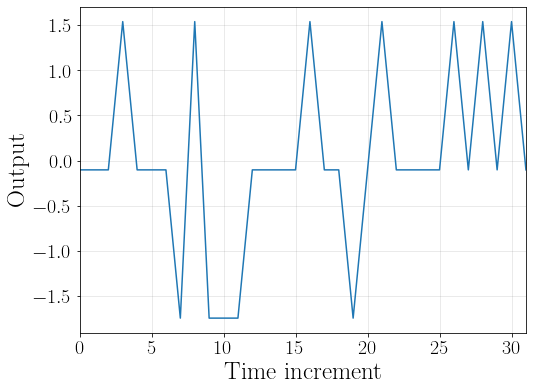

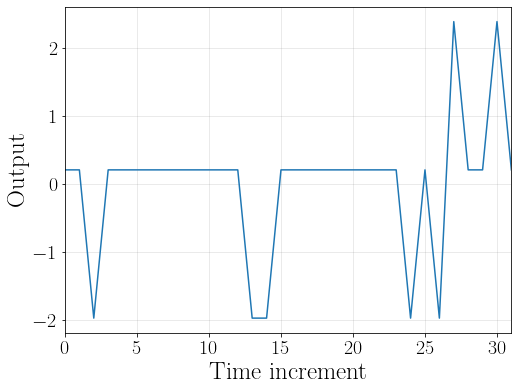

In [19]:
for i in range(10):
    lp.plot_event(df_for_clustering2.query("hdbscan == 2").iloc[i])